In [1]:
"""
Q3) Implement Sparse AutoEncoder using Numpy on MNIST dataset
Author- Subhra Shankha Bhattacherjee
Roll - EE19MTECH01008
"""

'\nQ3) Implement Sparse AutoEncoder using Numpy on MNIST dataset\nAuthor- Subhra Shankha Bhattacherjee\nRoll - EE19MTECH01008\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#important functions
def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return (sigmoid(x)-(sigmoid(x)**2))

def error(x,y):
    return np.linalg.norm(x-y)**2

def for_pass(x,w,b):
    return np.dot(x,w)+b


In [5]:
N = 60000 #number of training samples in MNIST
lr = 0.00001 #learning rate
hid_neur = 100 #number of hidden layer nodes
inpt_neur = 196 # (14 x 14)image input nodes, I have used 14x14 imgaes, since i was runnig into memory problem with 28x28 images
opt_neur = inpt_neur  # number of output nodes
lam = 2 #lagrange multiplier
p = 0.3 #sparsity constraint taken from Bernoulli RV with p=0.3



X_train = np.load("reshaped_mnist.npy") 
print(X_train.shape)
X = X_train.reshape(N,inpt_neur)
X = X/255.0


#Random initialization of weights and bias, 
#I multiplied with small value because I was having issues with initializing,
#the network was not learning anything

hid_w = 0.001*(np.random.uniform(size=(inpt_neur,hid_neur)))
hid_b = 0.001*(np.random.uniform(size=(1,hid_neur)))
opt_w = 0.001*(np.random.uniform(size=(hid_neur,opt_neur)))
opt_b = 0.001*(np.random.uniform(size=(1,opt_neur)))


(60000, 14, 14)


In [6]:
epochs = 50

#Training algorithm
for i in range(epochs):
  
    loss = 0
    w1 = np.zeros(hid_w.shape)
    b1 = np.zeros(hid_b.shape)
    w2 = np.zeros(opt_w.shape)
    b2 = np.zeros(opt_b.shape)

    #Forward Propagation

    hid = sigmoid(for_pass(X,hid_w,hid_b))
    pred = sigmoid(for_pass(hid,opt_w,opt_b))
    
    #Backpropagation
    
    loss = error(pred,X)
    hid_opt = 2*(pred-X)*sigmoid_derivative(for_pass(hid,opt_w,opt_b))
    z_m = np.mean(hid,axis = 0)
    kl = (lam)*(-p/z_m + (1-p)/(1-z_m))*sigmoid_derivative(for_pass(X,hid_w,hid_b))
    err_hid = np.matmul(hid_opt,opt_w.T)
    der_hid = kl + (sigmoid_derivative(for_pass(X,hid_w,hid_b))*err_hid)
   
    print(loss)
    
    #weight & bias update
    
    hid_w -= np.matmul(X.T,der_hid)*lr
    opt_w -= np.matmul(hid.T,hid_opt)*lr
    hid_b -= np.sum(der_hid,axis = 0,keepdims = True).reshape(np.shape(hid_b))*lr
    opt_b -= np.sum(hid_opt, axis = 0, keepdims = True).reshape(np.shape(opt_b))*lr
    

2583271.0674478454
1287798.7516228824
695412.1557820076
1368489.8071897572
630934.3221260433
990745.0830825665
649165.734324486
1130869.3016712714
616080.4034165933
884861.488588137
626152.6990646606
922253.2230206995
609734.3417777107
826455.9191892637
608571.987540842
790989.9341816709
602854.0352840626
749465.740407559
599434.7167521045
717069.0675696785
595961.0739989618
690452.1278988566
592954.007973623
669119.8923280915
590193.5842014921
652036.4999884771
587684.0863090905
638375.3410571518
585391.9393703175
627405.2887255349
583295.1595593371
618531.5925256145
581370.8082578507
611284.5353201571
579597.1146037956
605301.8736670028
577954.4503835452
600307.7539598615
576426.1001678573
596093.2230769168
574998.3992690953
592500.0199265695
573660.448889379
589407.8680559554
572403.6448611027
586724.8353276732
571221.1847533133
584380.149009454
570107.6356851438
582318.8847072497


In [7]:
out_1 = for_pass(X,hid_w,hid_b)
hid = sigmoid(out_1)
out_2 = for_pass(hid,opt_w,opt_b)
y_pred = sigmoid(out_2)
y_pred = y_pred*255.0

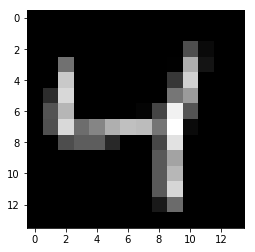

In [13]:
plt.imshow(X[2].reshape(14,14) , cmap='gray')
plt.show()

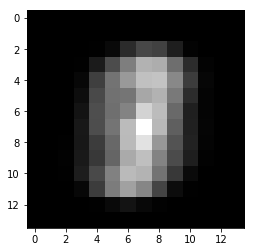

In [14]:
plt.imshow(y_pred[4].reshape(14,14) , cmap='gray' )
plt.show()